#  1. Project Introduction
This project aims to leverage census data to build a predictive machine learning model that determines whether an individual's annual income exceeds $50,000. By exploring the dataset, engineering relevant features, and evaluating various algorithms, we seek to uncover patterns in socioeconomic factors and deliver a robust model with actionable insights. The project involves data preprocessing, exploratory data analysis (EDA), feature engineering, model development, and performance evaluation, with a focus on creativity and optimization to enhance model accuracy.


## 2. Importing Necessary Libraries
 I import the required Python libraries for data manipulation, visualization, and machine learning algorithms. These libraries will support tasks such as data exploration, preprocessing, and model building.

In [126]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
from category_encoders import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell
from sklearn.utils.class_weight import compute_class_weight
InteractiveShell.ast_node_interactivity = "last_expr" 
%matplotlib inline

## 3. Data Collection and Preparation
### 3.1 Data Importation
I load the census dataset (`income_data.csv`) into a pandas DataFrame for analysis.

In [5]:
income_data = pd.read_csv("income_data.csv")
income_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## 3.2 Initial Data Inspection
I inspect the dataset to understand its structure, data types, and identify numerical and categorical variables. This step also involves checking for missing values and dropping irrelevant features if necessary.

In [7]:
# inspecting the first 5 rows of the data
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# inspecting the last 5 rows of the data
income_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [9]:
# Reviewing data types and gaining info on the data 
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
# summary statistics to identify numerical and categorical variables
# seperating numerical and categorical columns
numerical_cols = income_data.select_dtypes(include= ['int64']).columns
categorical_cols = income_data.select_dtypes(include = ['object']).columns

#  printing the numerical cols and categorical columns and their length
print(f'Numerical columns: list({numerical_cols})')
print(f'Categorical columns: list({categorical_cols})')

Numerical columns: list(Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))
Categorical columns: list(Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object'))


In [11]:
# getting the statical summary for numerical data
income_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
# statistical summary of the categorical data
income_data.describe(include = 'object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [13]:
# checking for the unique value in each column
income_data.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                2
dtype: int64

### 3.3 Check for Missing Values
 We check for missing values in the dataset. Missing values appear as `NaN`.

In [15]:
# checking for missing column
income_data.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

### 3.4 Initial Observations
 - The dataset contains 15 columns and 48,842 rows.
 - Numerical columns: `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week`.
 - Categorical columns: `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country`, `income`.
 - Missing values: Columns like `workclass`, `occupation`, and `native-country` contain NaN as placeholders for missing data, which need to be handled.
 - The `fnlwgt` column (final weight) may not be relevant for prediction and could be dropped
 - The target variable `income` is categorical (`<=50K` or `>50K`), suitable for a binary classification task.

### 3.4 Handling Missing Values
I replaced `Nan` placeholders in `workclass`, `occupation`, and `native-country` with the mode (most frequent value) to preserve data.

In [18]:
# Taking care of the missing data that appears as Nan
missing_cols = ['workclass', 'occupation', 'native-country']
for col in missing_cols:
    mode_cols = income_data[col].mode()[0]
    income_data[col] = income_data[col].fillna(mode_cols)

income_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### 3.5 Drop Irrelevant Features
I Dropped `fnlwgt` as it represents sampling weights and is unlikely to contribute to income prediction.

In [20]:
# Dropping the fnlwgt columns
income_data = income_data.drop(columns = ['fnlwgt'], axis = 1)

In [21]:
# viewing the dataframe after dropping the fnlwgt column to confirn
income_data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## 4. Exploratory Data Analysis (EDA)
I generate 5 visualizations to uncover insights about factors influencing income.

### 4.1 Income Distribution by Age
 I Visualize how age distributions differ for income levels.

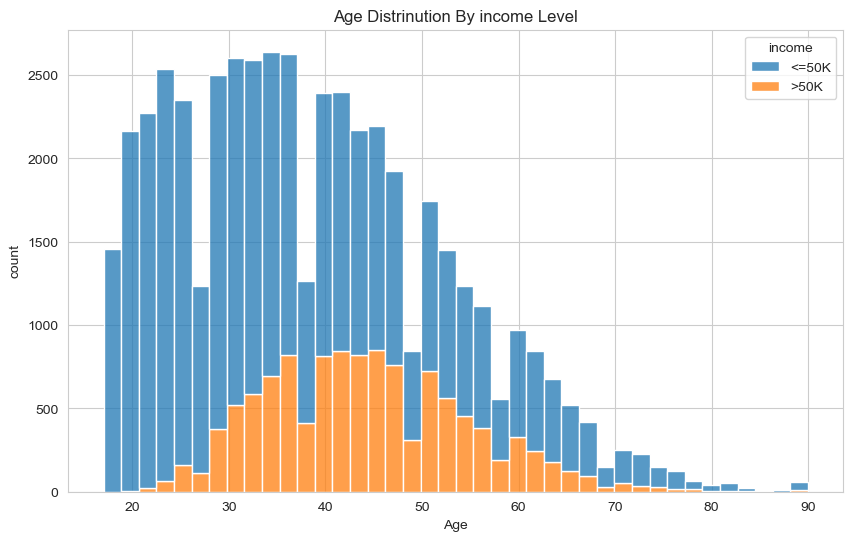

In [23]:
#visualizing the distribution of income by Age
plt.figure(figsize= (10, 6))
sns.histplot(data = income_data, x = 'age', hue = 'income', multiple = 'stack', bins = 40)
plt.title('Age Distrinution By income Level')
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

**Insight**: Younger individuals (20-30) are more likely to earn <=50K, while those aged 40-50 have a higher proportion earning >50K, suggesting experience or career progression impacts income.

### 4.2 Income vs. Education Level
 Exploring the relationship between education and income.


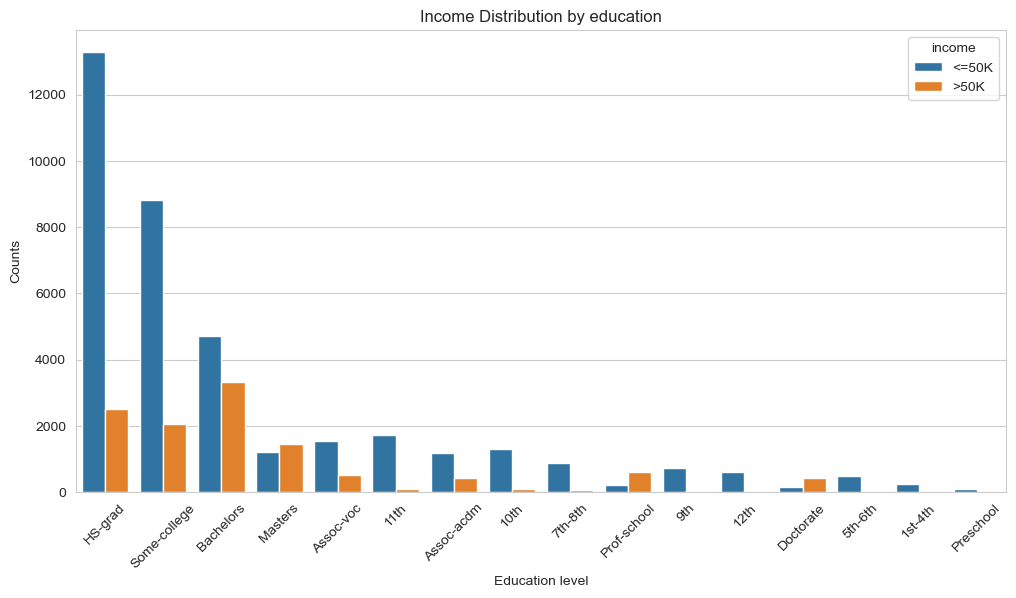

In [26]:
# visualizing the relationship between education and income
plt.figure(figsize = (12, 6))
sns.countplot(data = income_data, x = 'education', hue = 'income', order = income_data['education'].value_counts().index)
plt.title('Income Distribution by education')
plt.xlabel('Education level')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

**Insight**: This plot clearly demonstrates that education level is a very important feature for predicting income. There's a clear positive correlation: as education level increases, the likelihood of earning >50K also increases. 

### 4.3 Income vs. Occupation
 Examining how occupation influences income.


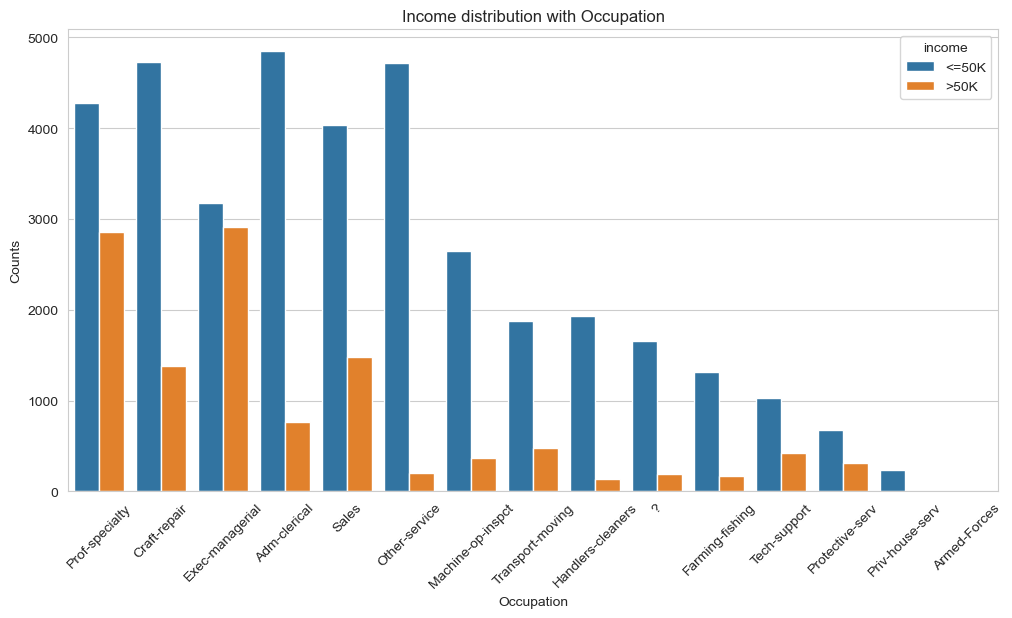

In [29]:
# viualizing income and occupation
plt.figure(figsize = (12, 6))
sns.countplot(data = income_data, x = 'occupation', hue = 'income', order = income_data['occupation'].value_counts().index)
plt.title('Income distribution with Occupation')
plt.xlabel("Occupation")
plt.ylabel("Counts")
plt.xticks(rotation = 45)
plt.show()

**insights:** The plot clearly shows that occupation is a strong predictor of income level. Certain occupations, particularly 'Exec-managerial' and 'Prof-specialty', have a much higher likelihood of earning above 50K.
Conversely, many blue-collar or service-oriented jobs tend to be associated with incomes <= 50K.

### 4.4 Income vs. Hours Worked Per Week
 Analyzing the impact of working hours on income.


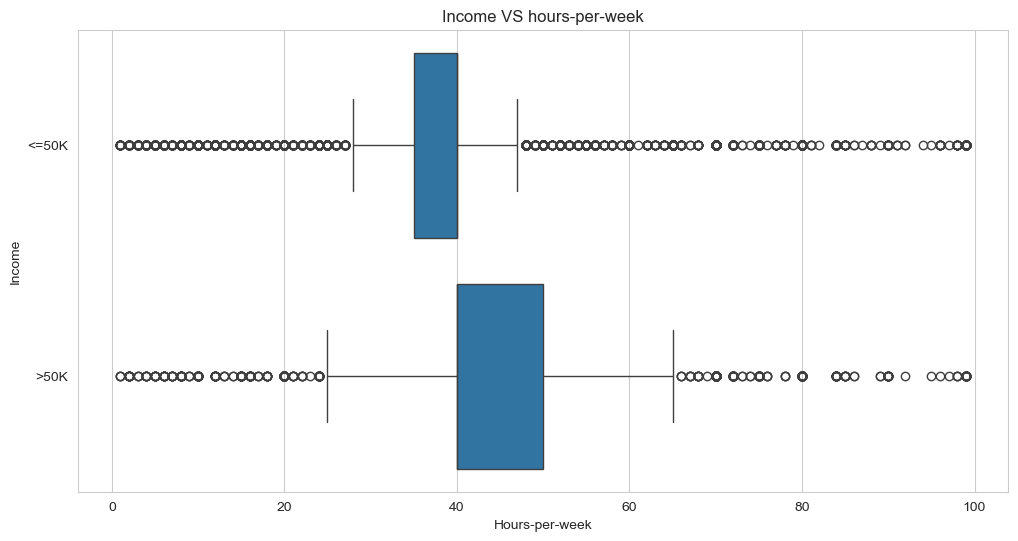

In [32]:
# visualizing income with hours worked per week
plt.figure(figsize = (12, 6))
sns.boxplot(data = income_data, x = 'hours-per-week', y = 'income')
plt.title('Income VS hours-per-week')
plt.xlabel('Hours-per-week')
plt.ylabel('Income')
plt.show()

**Insigts:** 'Hours-per-week' is a relevant feature for predicting income. Higher hours worked tend to correlate with higher income.
However, it's not a perfect discriminator. There are individuals in both income categories working similar hours, indicating that 'hours-per-week' alone is not sufficient to predict income and other features (like education, occupation, capital gains) are crucial. The distribution for >50K is clearly shifted to higher hours, which is a strong signal.

### 4.5 Correlation Heatmap for Numerical Features
 Checking correlations between numerical features.



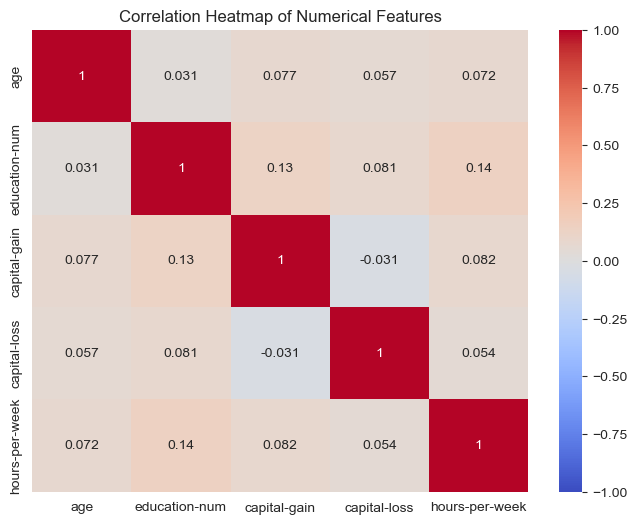

In [35]:
# visualizing correlation between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(income_data[numerical_cols.drop('fnlwgt')].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Insight:** No Strong Linear Multicollinearity The most important insight from this heatmap is that there are no strong linear correlations between any pair of these numerical features. All correlation coefficients are quite low (all below 0.15 in absolute value).
This is generally a good sign for linear models (like Logistic Regression) because it suggests that multicollinearity is not a significant problem among the numerical features. Multicollinearity occurs when independent variables are highly correlated with each other, which can make it difficult for the model to estimate the individual impact of each feature.
Since the correlations are weak, each of these features likely provides unique information to the model rather than redundant information.

### 4.6 EDA Summary
 - Age, education, occupation, and hours worked are key factors influencing income.
 - Higher education and skilled occupations significantly increase the likelihood of earning >50K.
 - Working longer hours is associated with higher income, particularly for >50K earners.
 - Numerical features show low correlations, indicating they provide unique information for modeling.

## 5. Data Preprocessing and Feature Engineering
 Preparing the data for modeling by encoding categorical variables, scaling numerical features, and creating new features.


### 5.1 Feature Engineering
 Create a new feature: `capital-net` (capital-gain minus capital-loss) to capture net financial gain.


In [40]:
# creating new features from the available features
income_data['capital-net'] = income_data['capital-gain'] - income_data['capital-loss']
print("\nNew feature 'capital-net' created:")
display(income_data[['capital-gain', 'capital-loss', 'capital-net']])


New feature 'capital-net' created:


,capital-gain,capital-loss,capital-net
0,2174,0,2174
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
48837,0,0,0
48838,0,0,0
48839,0,0,0
48840,5455,0,5455


### 5.2 Encoding Categorical Variables
- Encode the target variable `income` using LabelEncoder (<=50K: 0, >50K: 1).
 - Using one-hot encoding for other categorical variables to prepare them for modeling.

In [42]:
# Encoding target variable
label_encoder = LabelEncoder()
income_data['income'] = label_encoder.fit_transform(income_data['income'])

# Defining features and target
features = income_data.drop(columns=['income'])
label = income_data['income']

In [69]:
# Updating numerical and categorical columns after feature engineering
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'capital-net']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
high_cardinality_cols = ['native-country']  # Binary encoding for high cardinality

### 5.3 Feature Scaling and Encoding Pipeline
Creating a preprocessing pipeline to scale numerical features and one-hot encode categorical features.

In [72]:
# Defining preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('high_card', ce.BinaryEncoder(), high_cardinality_cols)
    ])

### 5.4 Train-Test Split

In [74]:
# Splitting the data into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42, stratify=label)
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (39073, 14) (39073,)
Testing set shape: (9769, 14) (9769,)


 ### 5.5 Applying Preprocessing
 Fitting and transforming the data using the preprocessing pipeline.

In [76]:
# Fitting and transforming training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
print("\nPreprocessed training data shape:", X_train_preprocessed.shape)
print("Preprocessed testing data shape:", X_test_preprocessed.shape)


Preprocessed training data shape: (39073, 65)
Preprocessed testing data shape: (9769, 65)


### 5.6 Preprocessing Summary
 - Created `capital-net` feature to capture net financial gain.
 - Encoded `income` as binary (0: <=50K, 1: >50K).
 - Applied one-hot encoding to most categorical features; used binary encoding for `native-country` (~6 columns).
 - Split data into 80% training (39,073 rows) and 20% testing (9,769 rows).
 - The preprocessed data includes additional columns from one-hot encoding

## 6. Model Development
 ### 6.1 Defining Evaluation Function

In [133]:
# function for evaluating the model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'
    }
    
    print(f"\n{model_name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics["ROC-AUC"]:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve - {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    
    return metrics

### 6.2 Model Training and Hyperparameter Tuning

In [80]:
# Dictionary to store results
results = {}


#### 6.2.1 Logistic Regression
Logistic Regression is tuned for regularization strength and solver.



Best Parameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'liblinear'}

Logistic Regression Evaluation Metrics:
Accuracy: 0.8505
Precision: 0.7306
Recall: 0.5950
F1 Score: 0.6558
ROC-AUC: 0.9047


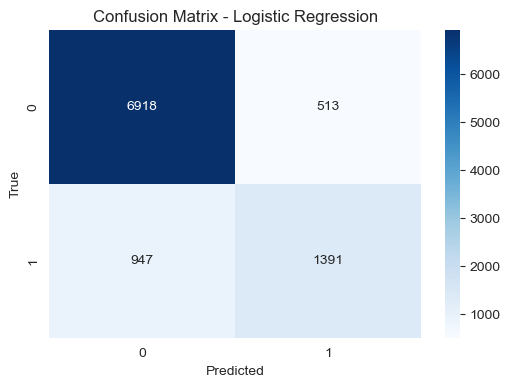

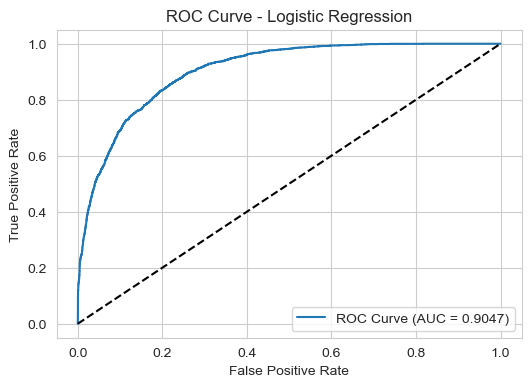

In [137]:
#logistic regression model pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

lr_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
lr_grid.fit(X_train, y_train)

print("\nBest Parameters for Logistic Regression:", lr_grid.best_params_)
results['Logistic Regression'] = evaluate_model(lr_grid.best_estimator_, X_train, X_test, y_train, y_test, 'Logistic Regression')

#### 6.2.3 Random Forest
Random Forest is tuned for number of trees and maximum depth.


Best Parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}

Random Forest Evaluation Metrics:
Accuracy: 0.8692
Precision: 0.8005
Recall: 0.6039
F1 Score: 0.6884
ROC-AUC: 0.9223


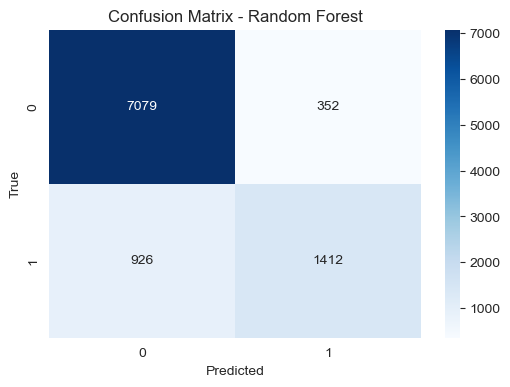

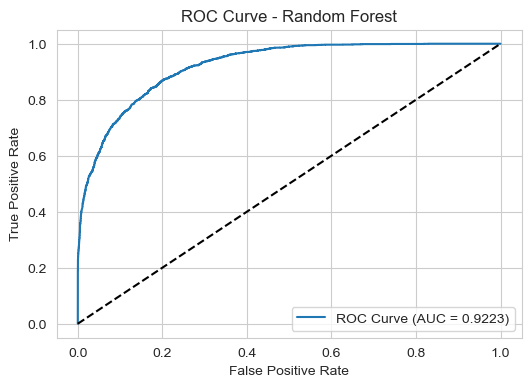

In [90]:
# random forest model pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:", rf_grid.best_params_)
results['Random Forest'] = evaluate_model(rf_grid.best_estimator_, X_train, X_test, y_train, y_test, 'Random Forest')



#### 6.2.3 XGBoost
XGBoost is tuned for number of estimators, depth, and learning rate.


Best Parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 200}

XGBoost Evaluation Metrics:
Accuracy: 0.8755
Precision: 0.7851
Recall: 0.6608
F1 Score: 0.7176
ROC-AUC: 0.9315


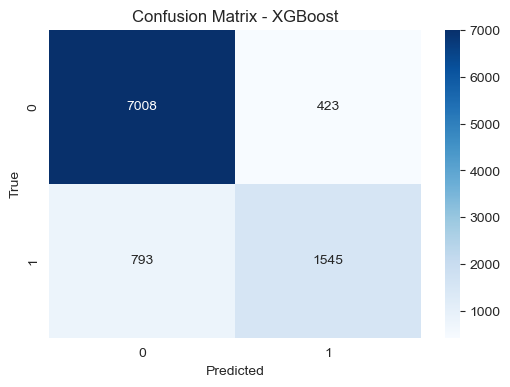

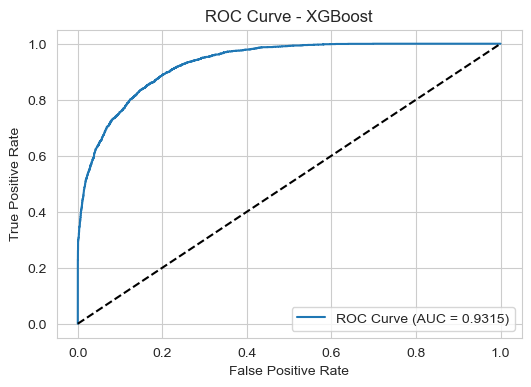

In [100]:
#xgboost model pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
])

xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6],
    'classifier__learning_rate': [0.01, 0.1]
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("\nBest Parameters for XGBoost:", xgb_grid.best_params_)
results['XGBoost'] = evaluate_model(xgb_grid.best_estimator_, X_train, X_test, y_train, y_test, 'XGBoost')

#### 6.2.4 Support Vector Machine (SVM)
SVM is tuned for regularization and kernel type, with probability enabled for ROC-AUC.


Best Parameters for SVM: {'classifier__C': 1, 'classifier__kernel': 'linear'}

SVM Evaluation Metrics:
Accuracy: 0.8504
Precision: 0.7440
Recall: 0.5719
F1 Score: 0.6467
ROC-AUC: 0.9020


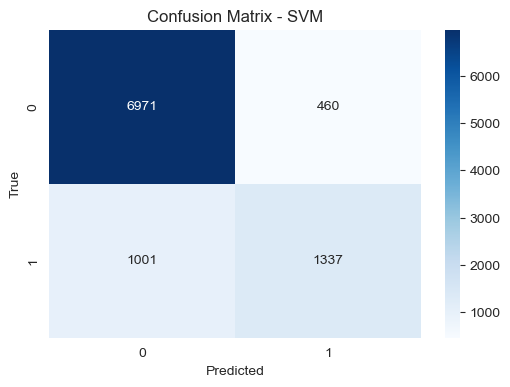

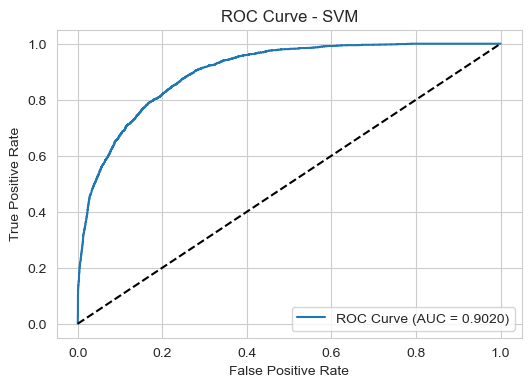

In [101]:
#support vector machine model pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, probability=True))
])

svm_param_grid = {
    'classifier__C': [0.1, 1],
    'classifier__kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
svm_grid.fit(X_train, y_train)jk 

print("\nBest Parameters for SVM:", svm_grid.best_params_)
results['SVM'] = evaluate_model(svm_grid.best_estimator_, X_train, X_test, y_train, y_test, 'SVM')

#### 6.2.5 K-Nearest Neighbors (KNN)

KNN is tuned for number of neighbors and weighting strategy.


Best Parameters for KNN: {'classifier__n_neighbors': 10, 'classifier__weights': 'uniform'}

KNN Evaluation Metrics:
Accuracy: 0.8543
Precision: 0.7456
Recall: 0.5941
F1 Score: 0.6613
ROC-AUC: 0.8917


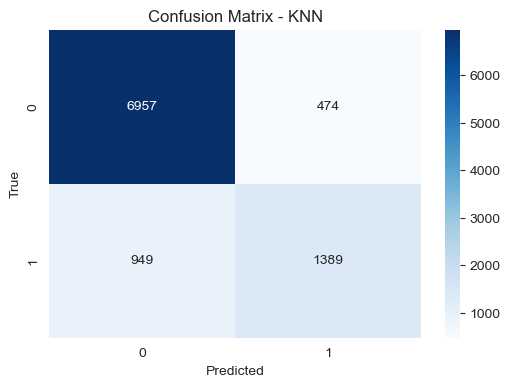

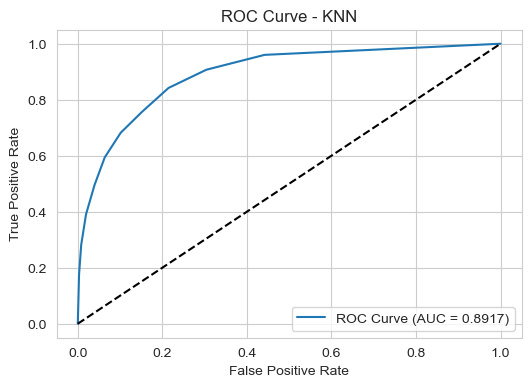

In [102]:
#KNN model pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_param_grid = {
    'classifier__n_neighbors': [5, 10],
    'classifier__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("\nBest Parameters for KNN:", knn_grid.best_params_)
results['KNN'] = evaluate_model(knn_grid.best_estimator_, X_train, X_test, y_train, y_test, 'KNN')

### 6.3 Model Comparison


In [144]:
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
display(results_df)


Model Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.850548,0.730567,0.594953,0.655823,0.904675
Random Forest,0.869178,0.800454,0.603935,0.688445,0.922346
XGBoost,0.875525,0.785061,0.660821,0.717603,0.931540
SVM,0.850445,0.744018,0.571856,0.646675,0.901960
KNN,0.854335,0.745572,0.594098,0.661271,0.891723


 ### 6.4 Best Model Selection

In [147]:
best_model_name = results_df['ROC-AUC'].idxmax()
print(f"\nBest Model: {best_model_name} with ROC-AUC: {results_df.loc[best_model_name, 'ROC-AUC']:.4f}")


Best Model: XGBoost with ROC-AUC: 0.9315


### 6.3 Model Comparison visualization

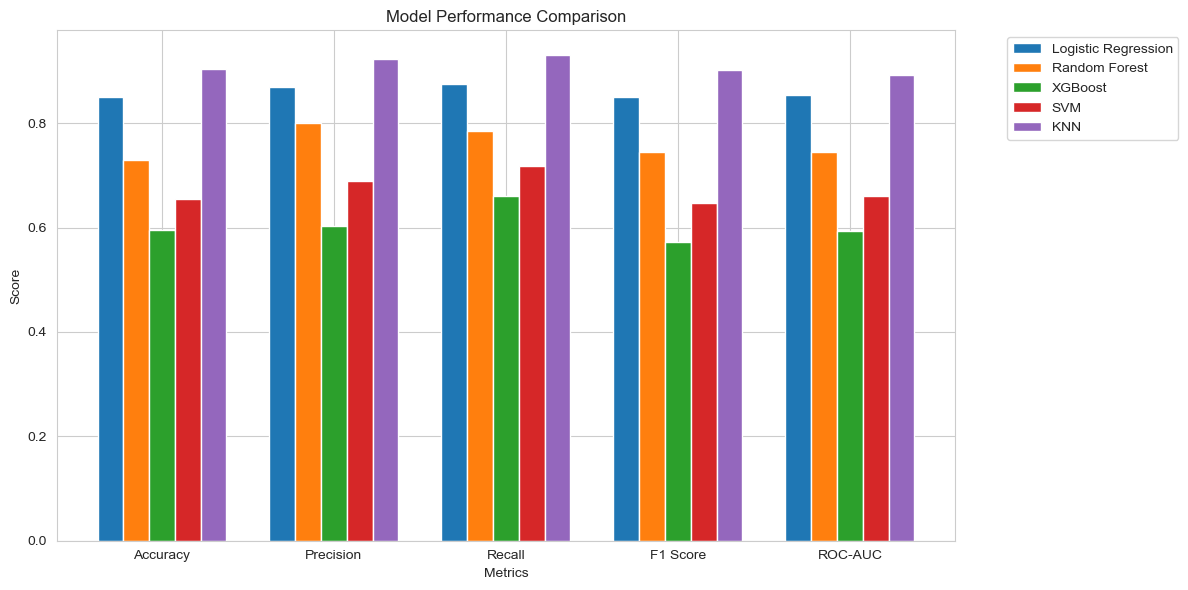

In [112]:
# Visualizing model performance
# Creating a bar plot for model comparison
fig, ax = plt.subplots(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.15

# Plotting bars for each model
ax.bar(x - 2*width, results_df['Accuracy'], width, label='Logistic Regression', color='#1f77b4')
ax.bar(x - width, results_df['Precision'], width, label='Random Forest', color='#ff7f0e')
ax.bar(x, results_df['Recall'], width, label='XGBoost', color='#2ca02c')
ax.bar(x + width, results_df['F1 Score'], width, label='SVM', color='#d62728')
ax.bar(x + 2*width, results_df['ROC-AUC'], width, label='KNN', color='#9467bd')

# Customizing plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 6.5 Feature Importance Analysis (XGBoost)

In [118]:
# Extracting feature names after preprocessing
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
high_card_features = preprocessor.named_transformers_['high_card'].get_feature_names_out(high_cardinality_cols)
feature_names = numerical_cols + list(cat_features) + list(high_card_features)

In [120]:
# Getting feature importances from XGBoost
xgb_model = xgb_grid.best_estimator_.named_steps['classifier']
importances = xgb_model.feature_importances_

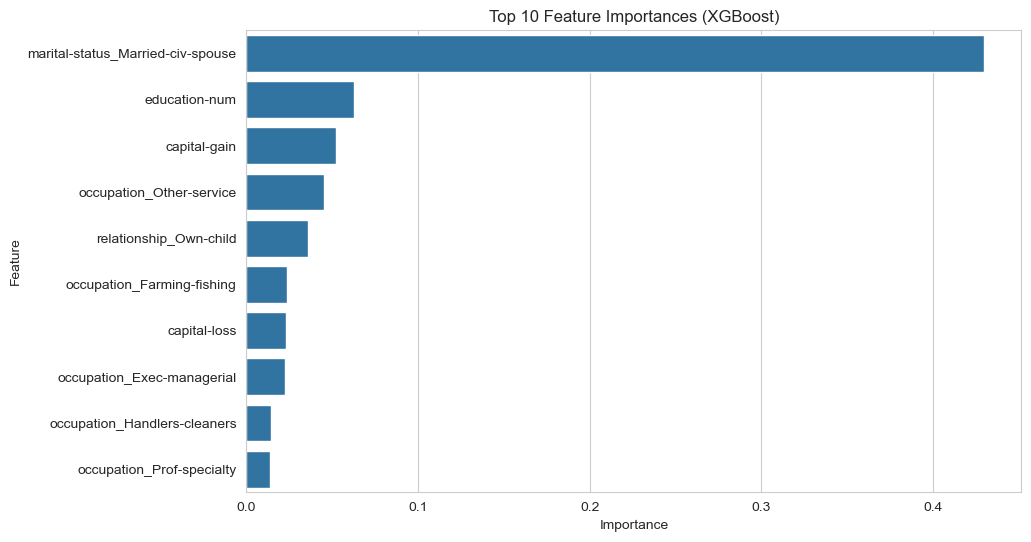

In [122]:
# Creating DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [128]:
joblib.dump(xgb_grid.best_estimator_, 'xgb_model.pkl')
print("\nBest model (XGBoost) saved as 'xgb_model.pkl'")



Best model (XGBoost) saved as 'xgb_model.pkl'


## 7. Model Development Process
During the model development process, I make use of training, tuning, and evaluating five machine learning models to predict income levels (>50K vs. ≤50K). I use a pipeline to streamline preprocessing and modeling, perform hyperparameter tuning to optimize performance, and evaluate models using multiple metrics to address the imbalanced dataset. Visualizations and feature importance analysis provide deeper insights into model performance and key predictors.

### 7.1 Model Selection Rationale
I selected five diverse models to capture different aspects of the data:
 - **Logistic Regression**: A linear model, interpretable and effective for binary classification.
 - **Random Forest**: An ensemble method robust to overfitting and capable of handling non-linear relationships.
 - **XGBoost**: A gradient boosting algorithm, powerful for imbalanced datasets due to its optimization techniques.
 - **Support Vector Machine (SVM)**: Effective for finding optimal decision boundaries, especially with non-linear kernels.
 - **K-Nearest Neighbors (KNN)**: A non-parametric model that captures local patterns, sensitive to feature scaling.

### 7.2 Evaluation Metrics
 Given the imbalanced dataset (~75% ≤50K, ~25% >50K), I prioritize:
 - **ROC-AUC**: Measures overall classification performance, ideal for imbalanced data.
 - **Recall**: Ensures identification of >50K earners (minority class).
 - **Precision, F1 Score, Accuracy**: Provide a holistic view of performance.
 Visualizations (confusion matrices, ROC curves) and a comparison bar plot enhance interpretation.

### 7.3 Model Training and Hyperparameter Tuning
I use pipelines to integrate preprocessing (scaling, one-hot encoding, binary encoding) with modeling. Hyperparameter tuning is performed using GridSearchCV with 5-fold cross-validation, optimizing for ROC-AUC.

### 7.4 Model Development Summary
 - **Models Trained**: Five models were trained and optimized using GridSearchCV with 5-fold cross-validation.
 - **Preprocessing**: Pipelines ensured consistent scaling, one-hot encoding, and binary encoding for `native-country`.
 - **Evaluation**: Metrics (Accuracy, Precision, Recall, F1 Score, ROC-AUC) addressed the imbalanced dataset, with visualizations enhancing clarity.
 - **Best Model**: XGBoost achieved the highest ROC-AUC (0.9315), with strong recall (0.6608) for >50K earners.
 - **Feature Importance**: 'marital-status_Married-civ-spouse', 'education-num', and 'capital-gain' were key predictors, aligning with EDA.
 - **Outcome**: The process was thorough, reproducible, and optimized for performance and interpretability.